In [10]:
!pip install opencv-python
!pip install scikit-image

In [60]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from numpy.lib.stride_tricks import as_strided
import PIL
from pandas import DataFrame
import pandas as pd
from IPython.display import display, HTML
from skimage.exposure import rescale_intensity
import json
import os
from itertools import product
import itertools
import random
import glob
from pathlib import Path
from datetime import datetime
import datetime
from matplotlib.colors import Normalize


def set_axis(x, no_labels = 7)->tuple[np.array, np.array]:
    """Sets the x-axis positions and labels for a plot.

    Args:
        x (np.array): The x-axis data.
        no_labels (int, optional): The number of labels to display. Defaults to 7.

    Returns:
        tuple[np.array, np.array]: A tuple containing:
            - The positions of the labels on the x-axis.
            - The labels themselves.
    """
    nx = x.shape[0]
    step_x = int(nx / (no_labels - 1)) 
    x_positions = np.arange(0,nx,step_x) 
    x_labels = x[::step_x]
    return x_positions, x_labels

pd.options.display.html.border = 0
pd.options.display.float_format = '{:,.2f}'.format

In [61]:
if "google.colab" in str(get_ipython()):
    from google.colab.patches import cv2_imshow

    imshow = cv2_imshow
else:

    def imshow(img):
        img = img.clip(0, 255).astype("uint8")
        if img.ndim == 3:
            if img.shape[2] == 4:
                img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
            else:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        display(PIL.Image.fromarray(img))

In [62]:
def h_color(a, interpolation=None, size=None, fy=1.5, fx=1.5, cmap="gray"):
    s = [int(a.shape[0] * fy), int(a.shape[1] * fx)] if size is None else size
    plt.figure(figsize=s)
    plt.tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        labelleft=False,
        left=False,
        right=False,
    )
    plt.imshow(a, cmap=cmap, interpolation=interpolation)

In [63]:
css = """
<style type="text/css">
  table, td, table.dataframe, table.dataframe td {
    border: 1px solid black;    //border: double;
    border-collapse: collapse;
    border-style: solid;
    border-spacing: 0px;
    background-color: rgb(250,250,250);
    width: 24px;
    height: 24px;
    text-align: center;
    transform: scale(1.0);
    margin: 5px;
    }
</style>
"""


def h(s):
    return display(HTML(css + DataFrame(s).to_html(header=False, index=False)))

In [64]:
def h_color_3d(z):
    fig = go.Figure(data=[go.Surface(z=z)])
    fig.update_layout(autosize=False, width=500, height=500)
    fig.show()

### **Load Data**

### 1st Range : 090422 - 090612

In [65]:
pattern = os.path.join("..\\dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '090422'
end = '090612'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [67]:
dx= 5.106500953873407 
dt= 0.0016

data1 = []
first_filename = selected[0]
for file in selected:
   data1.append(np.load(file))
data1 = np.concatenate(data1)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data1), freq=f'{dt}s')
columns = np.arange(len(data1[0])) * dx
df1 = pd.DataFrame(data=data1, index=index, columns=columns)
df1

,0.00,5.11,10.21,15.32,20.43,25.53,30.64,35.75,40.85,45.96,...,214.47,219.58,224.69,229.79,234.90,240.01,245.11,250.22,255.33,260.43
2024-05-07 09:04:22.000000,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00
2024-05-07 09:04:22.001600,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00
2024-05-07 09:04:22.003200,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
2024-05-07 09:04:22.004800,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00
2024-05-07 09:04:22.006400,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-07 09:06:21.992000,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
2024-05-07 09:06:21.993600,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
2024-05-07 09:06:21.995200,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
2024-05-07 09:06:21.996800,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,...,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00


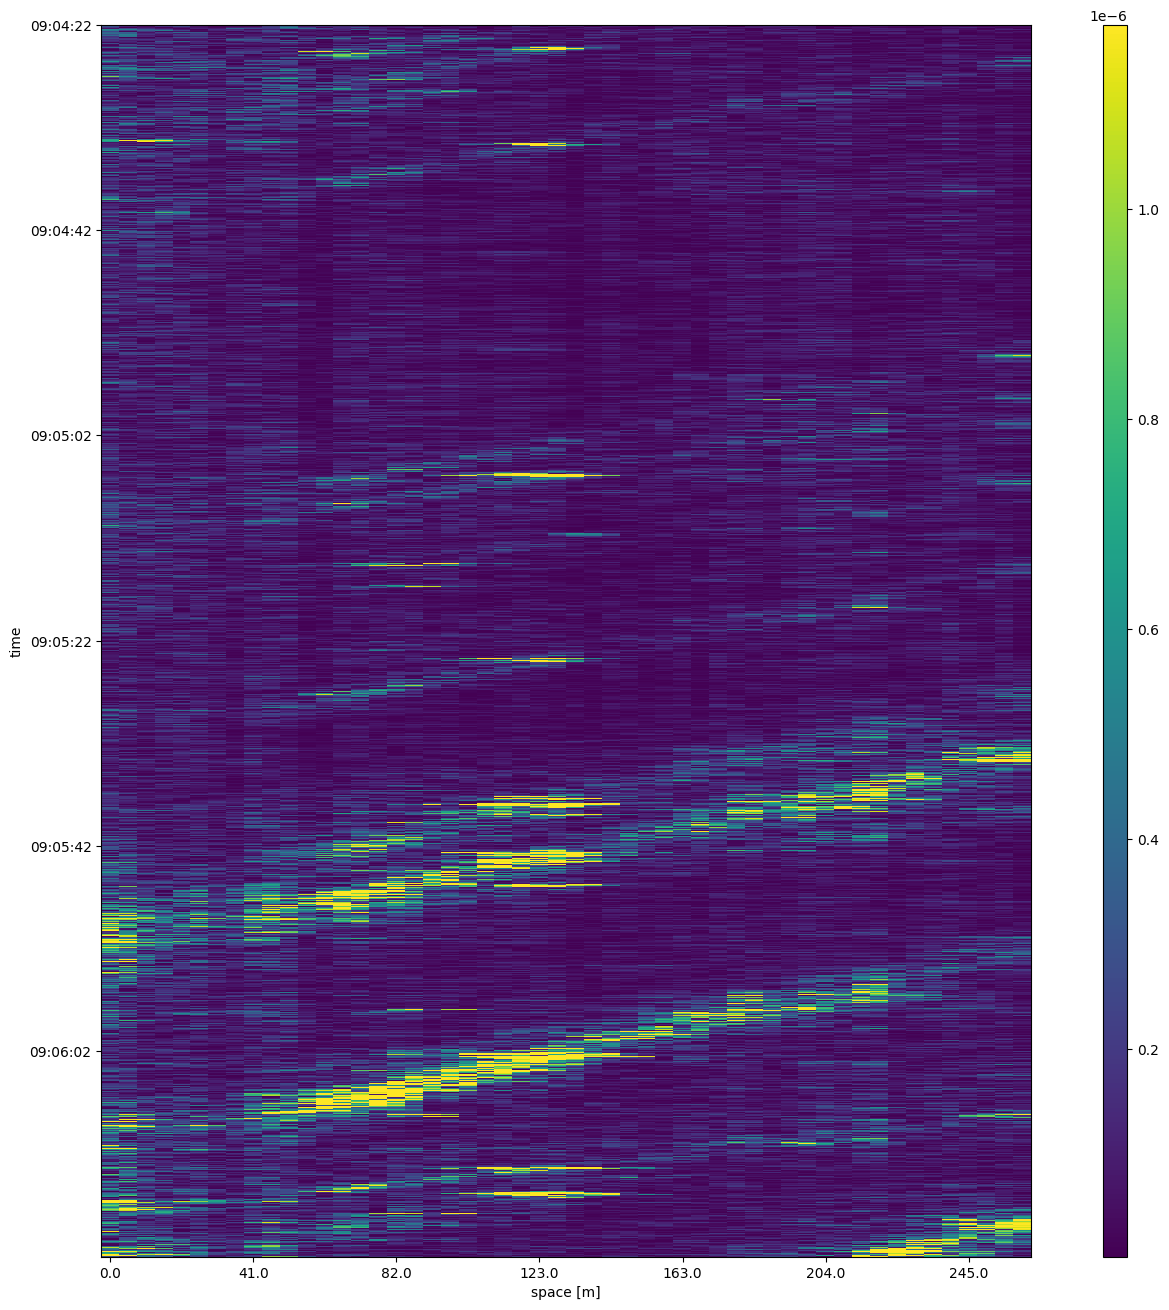

In [68]:


fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df1 -= df1.mean()
df1 = np.abs(df1) 
low, high = np.percentile(df1, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df1,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df1.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df1.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()


### 2nd Range : 093522 - 093712

In [69]:
pattern = os.path.join("..\\dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '093522'
end = '093712'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [70]:
data2 = []
first_filename = selected[0]
for file in selected:
   data2.append(np.load(file))
data2 = np.concatenate(data2)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data2), freq=f'{dt}s')
columns = np.arange(len(data2[0])) * dx
df2 = pd.DataFrame(data=data2, index=index, columns=columns)
df2

,0.00,5.11,10.21,15.32,20.43,25.53,30.64,35.75,40.85,45.96,...,214.47,219.58,224.69,229.79,234.90,240.01,245.11,250.22,255.33,260.43
2024-05-07 09:35:22.000000,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,...,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
2024-05-07 09:35:22.001600,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00
2024-05-07 09:35:22.003200,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
2024-05-07 09:35:22.004800,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
2024-05-07 09:35:22.006400,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-07 09:37:21.992000,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,...,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2024-05-07 09:37:21.993600,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2024-05-07 09:37:21.995200,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2024-05-07 09:37:21.996800,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00


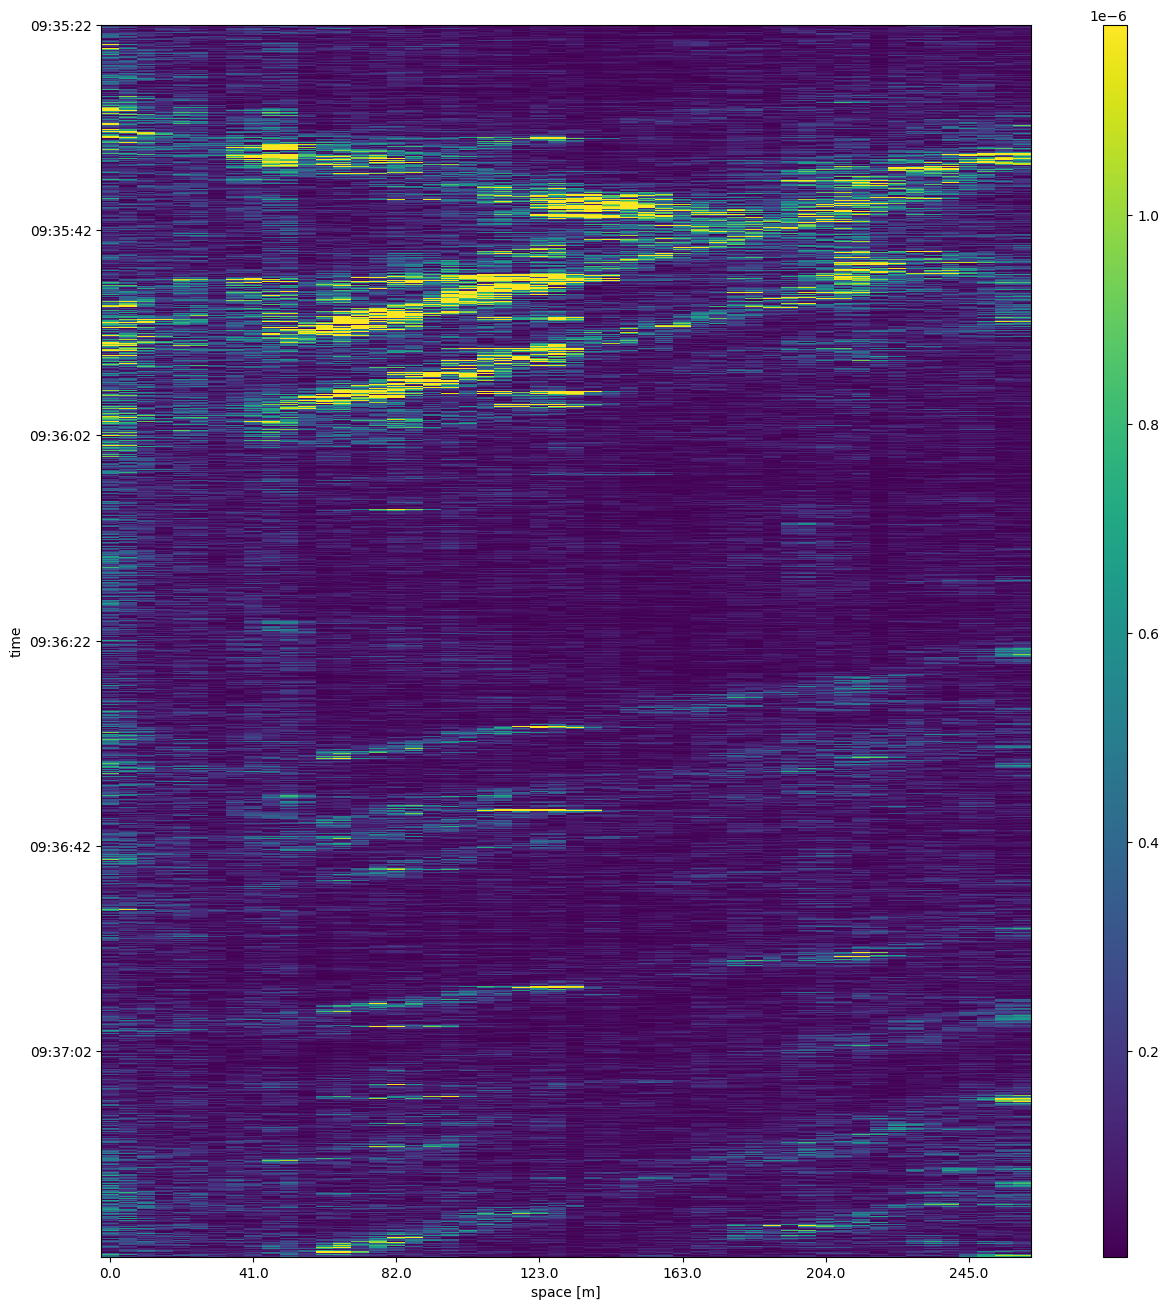

In [71]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df2 -= df2.mean()
df2 = np.abs(df2) 
low, high = np.percentile(df2, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df2,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df2.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df2.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()

### 3rd Range : 094122 - 094312

In [72]:
pattern = os.path.join("..\\dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '094122'
end = '094312'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [73]:
data3 = []
first_filename = selected[0]
for file in selected:
   data3.append(np.load(file))
data3 = np.concatenate(data3)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data3), freq=f'{dt}s')
columns = np.arange(len(data3[0])) * dx
df3 = pd.DataFrame(data=data3, index=index, columns=columns)
df3

,0.00,5.11,10.21,15.32,20.43,25.53,30.64,35.75,40.85,45.96,...,214.47,219.58,224.69,229.79,234.90,240.01,245.11,250.22,255.33,260.43
2024-05-07 09:41:22.000000,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
2024-05-07 09:41:22.001600,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00
2024-05-07 09:41:22.003200,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,...,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00
2024-05-07 09:41:22.004800,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,...,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00
2024-05-07 09:41:22.006400,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,...,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-07 09:43:21.992000,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00
2024-05-07 09:43:21.993600,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00
2024-05-07 09:43:21.995200,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00
2024-05-07 09:43:21.996800,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00


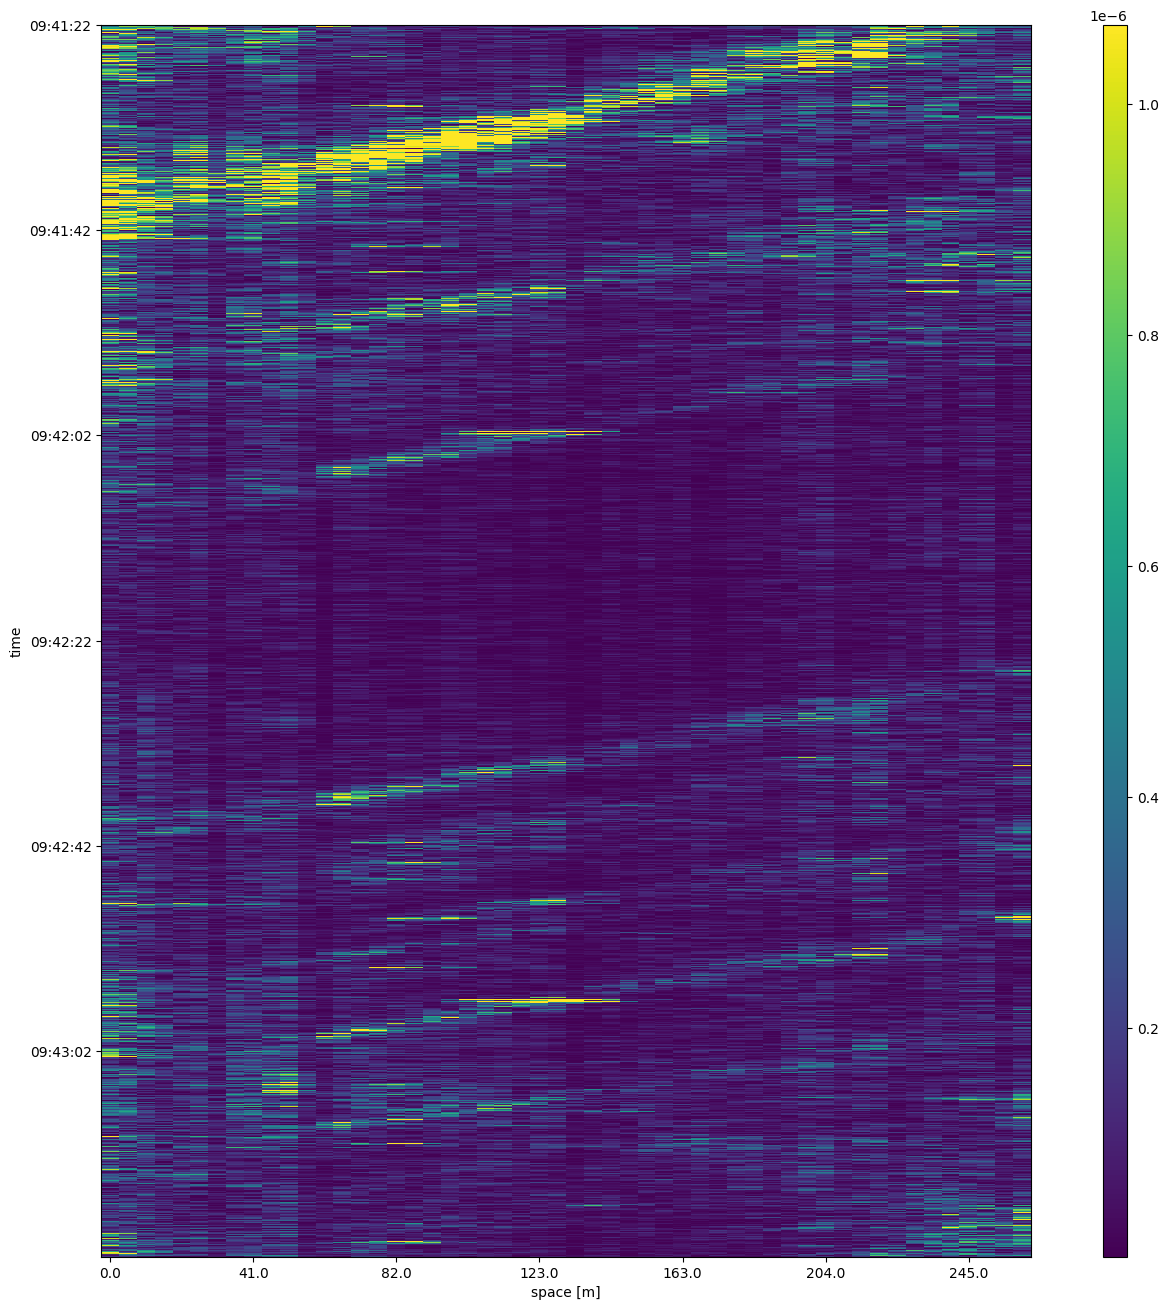

In [74]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df3 -= df3.mean()
df3 = np.abs(df3) 
low, high = np.percentile(df3, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df3,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df3.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df3.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()